In [ ]:
# import the libaraires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# import the data
df = pd.read_csv("/content/Employee_last_cleaned.csv")
df2 = pd.read_csv("/content/PerformanceRating.csv")

In [ ]:
df

,EmployeeID,Gender,Age,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,...,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,full name
0,3012-1A41,Female,30,Sales,27,IL,White,Doctorate,Marketing,Sales Executive,...,102059,1,No,2012-01-03,No,10,4,9,7,Leonelle Simco
1,CBCB-9C9D,Male,38,Sales,23,CA,White,Masters,Marketing,Sales Executive,...,157718,0,Yes,2012-01-04,No,10,6,10,0,Leonerd Aland
2,95D7-1CE9,Male,43,Human Resources,29,CA,Asian or Asian American,Masters,Marketing,HR Business Partner,...,309964,1,No,2012-01-04,No,10,6,10,8,Ahmed Sykes
3,47A0-559B,undefiend,39,Technology,12,IL,White,Bachelors,Computer Science,Engineering Manager,...,293132,0,No,2012-01-05,No,10,10,10,0,Ermentrude Berrie
4,42CC-040A,Female,29,Human Resources,29,CA,White,High School,Technical Degree,Recruiter,...,49606,0,No,2012-01-05,Yes,6,1,1,6,Stace Savege
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Male,20,Technology,28,CA,Black or African American,High School,Computer Science,Software Engineer,...,38508,0,No,2022-12-26,No,0,0,0,0,Jud Melanaphy
1466,6FB9-A624,undefiend,27,Technology,8,CA,Black or African American,Bachelors,Business Studies,Senior Software Engineer,...,92995,3,No,2022-12-30,No,0,0,0,0,Marc Calver
1467,EBF4-5928,Male,21,Sales,4,CA,Black or African American,Masters,Marketing,Sales Executive,...,63375,0,No,2022-12-30,No,0,0,0,0,Rudolph MacDearmont
1468,60E6-B1D9,Male,21,Technology,7,CA,Black or African American,Bachelors,Information Systems,Data Scientist,...,46521,0,No,2022-12-30,No,0,0,0,0,Merill Agg


In [ ]:
df.columns

Index(['EmployeeID', 'Gender', 'Age', 'Department', 'DistanceFromHome (KM)',
       'State', 'Ethnicity', 'Education', 'EducationField', 'JobRole',
       'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'HireDate',
       'Attrition', 'YearsAtCompany', 'YearsInMostRecentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'full name'],
      dtype='object')

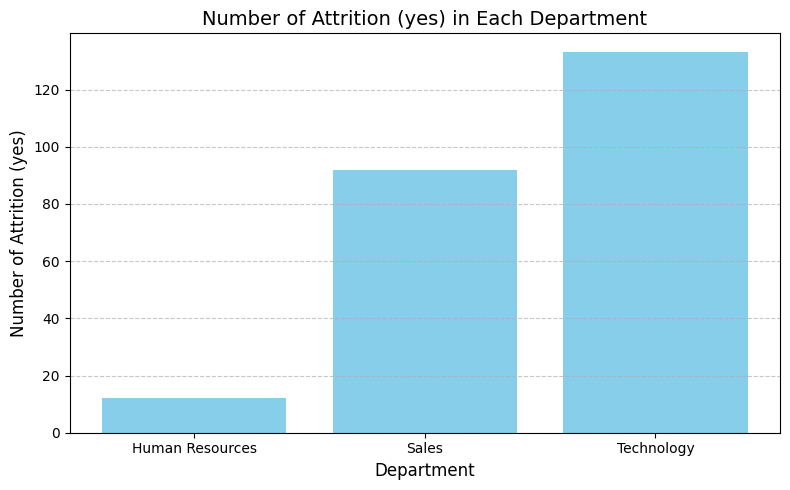

In [ ]:
# Filtering and grouping to replicate the SQL query
result = (df[df['Attrition'] == 'Yes']
          .groupby(['Department', 'Attrition'])
          .size()
          .reset_index(name='No.Attrition (yes) in Department'))

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(result['Department'], result['No.Attrition (yes) in Department'], color='skyblue')

plt.title('Number of Attrition (yes) in Each Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Attrition (yes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<ipython-input-6-3e75a0be4bb1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df[df['Attrition'] == 'Yes'].groupby('Age_Group').size().reset_index(name='Attrition Number')


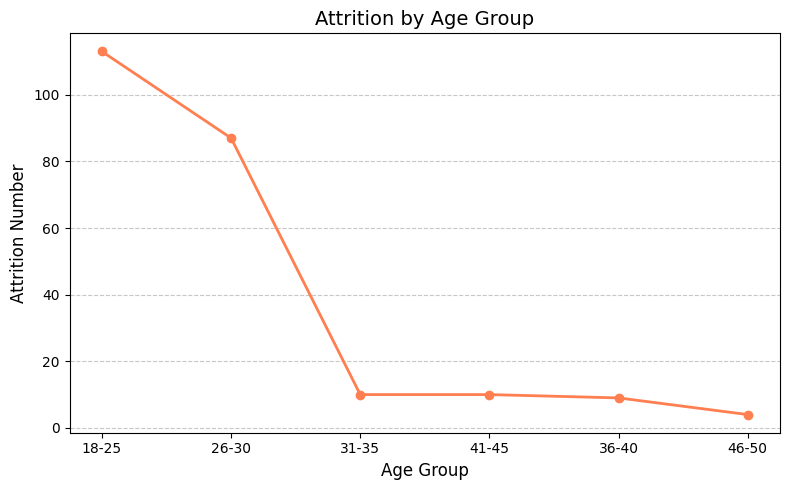

In [ ]:
# Creating age groups and filtering for attrition 'yes'
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[18, 25, 30, 35, 40, 45, 50],
                         labels=['18-25', '26-30', '31-35', '36-40', '41-45', '46-50'],
                         right=True)

# Counting the number of attritions in each age group
result = df[df['Attrition'] == 'Yes'].groupby('Age_Group').size().reset_index(name='Attrition Number')

# Sorting the result by Attrition Number in descending order
result = result.sort_values(by='Attrition Number', ascending=False)

# Plotting the data as a line plot
plt.figure(figsize=(8, 5))
plt.plot(result['Age_Group'], result['Attrition Number'], marker='o', color='coral', linestyle='-', linewidth=2)

plt.title('Attrition by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Attrition Number', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

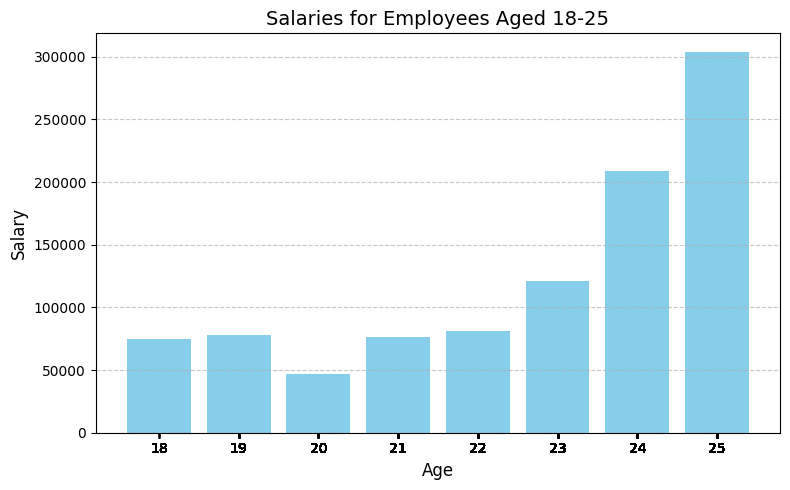

In [ ]:
# Filtering for employees aged 18 to 25
young_employees = df[(df['Age'] >= 18) & (df['Age'] <= 25)]


# Plotting the salaries of employees aged 18 to 25
plt.figure(figsize=(8, 5))
plt.bar(young_employees['Age'], young_employees['Salary'], color='skyblue')

plt.title('Salaries for Employees Aged 18-25', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(young_employees['Age'])  # Set x-ticks to the ages present
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Attrition

 ## Percent of Outliers in the Data

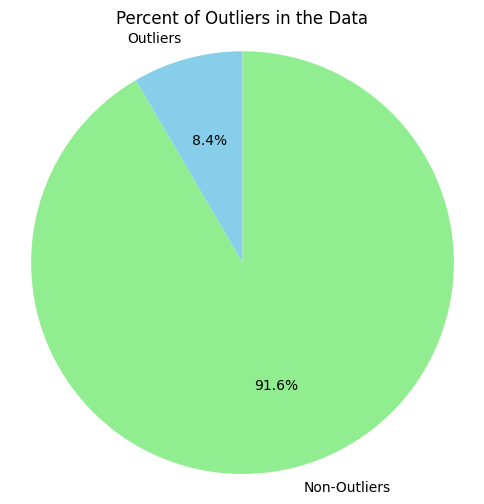

In [ ]:
# Percent of outliers
percent_of_outliers = (df[df['Salary'] >= 289768.625].shape[0] / df.shape[0]) * 100
percent_of_non_outliers = 100 - percent_of_outliers

# Pie chart
plt.figure(figsize=(6, 6))
labels = ['Outliers', 'Non-Outliers']
sizes = [percent_of_outliers, percent_of_non_outliers]
colors = ['skyblue', 'lightgreen']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percent of Outliers in the Data')
plt.axis('equal')
plt.show()


## JobRole for Outliers

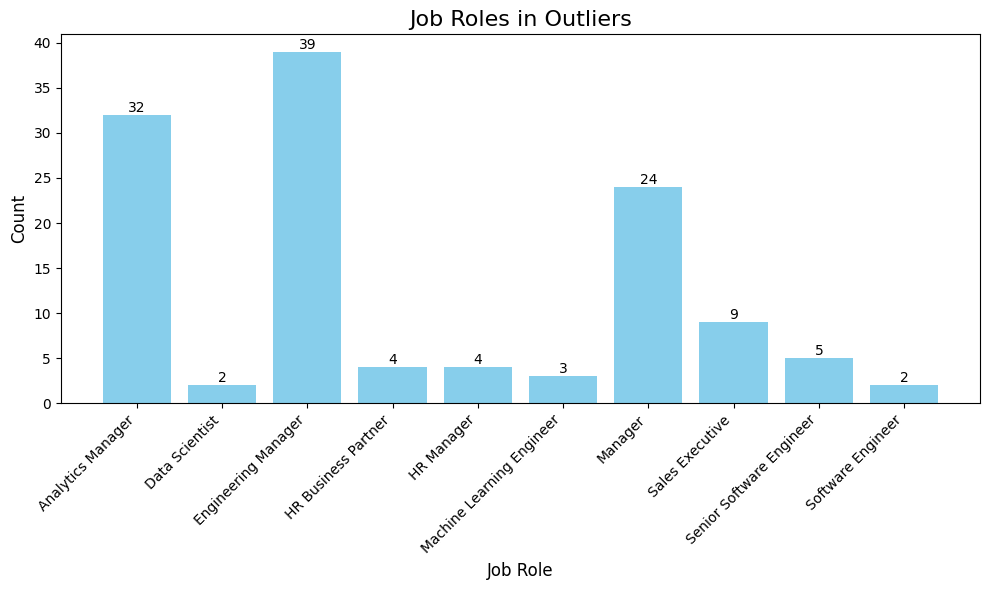

In [ ]:
# JobRole for outliers
job_role_outliers = df[df['Salary'] > 289768.625].groupby('JobRole').size().reset_index(name='count')

# Bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(job_role_outliers['JobRole'], job_role_outliers['count'], color='skyblue')

plt.title('Job Roles in Outliers', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Manager Salary in Outliers

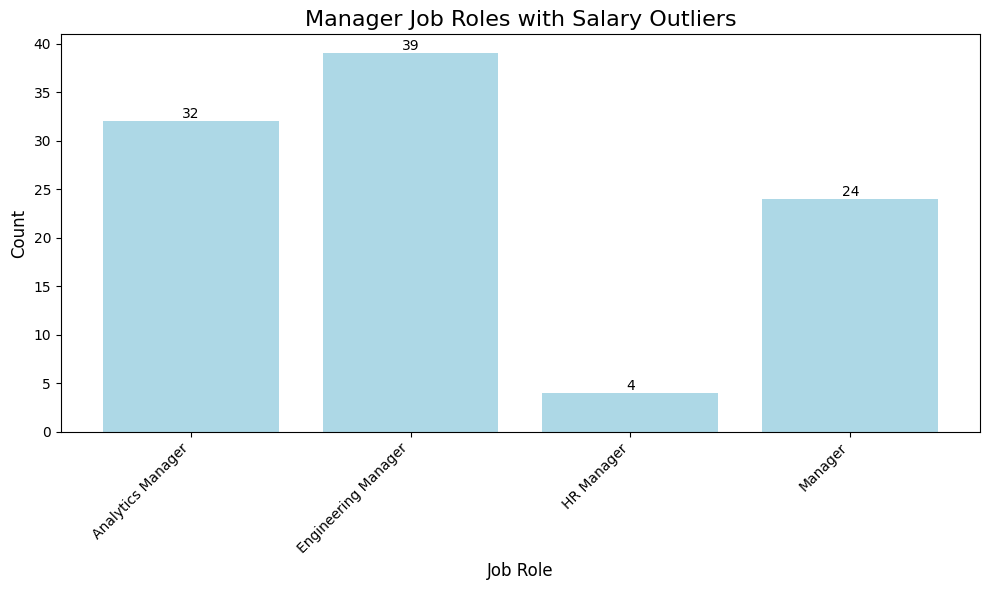

In [ ]:
# Manager salary in outliers
manager_salary_outliers = df[(df['Salary'] > 289768.625) & (df['JobRole'].str.contains('Manager'))].groupby('JobRole').size().reset_index(name='Count of JobRoles')

# Bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(manager_salary_outliers['JobRole'], manager_salary_outliers['Count of JobRoles'], color='lightblue')

plt.title('Manager Job Roles with Salary Outliers', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Other Roles Salary in Outliers

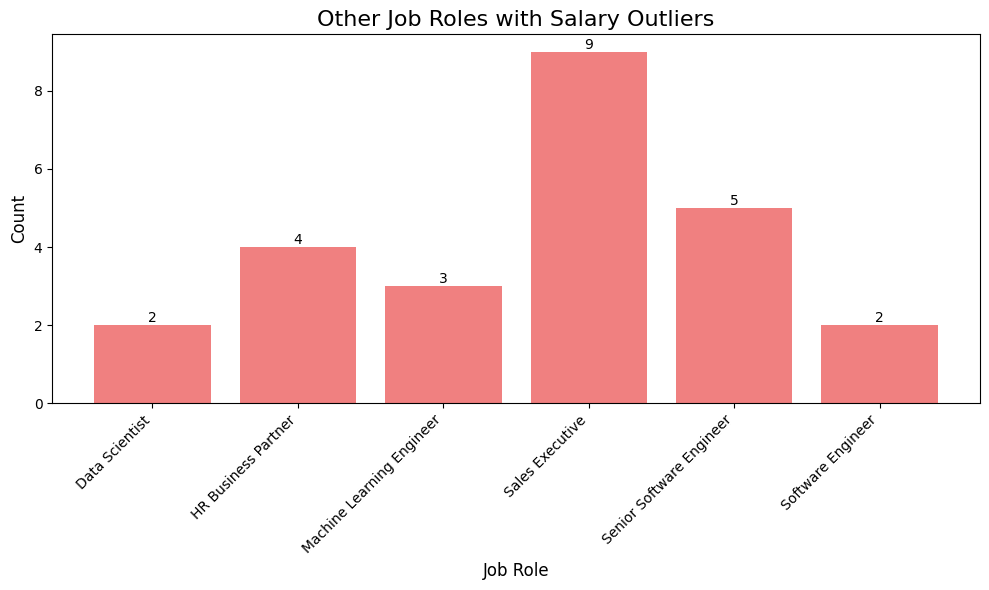

In [ ]:
# Other roles salary in outliers
other_roles_salary_outliers = df[(df['Salary'] > 289768.625) & (~df['JobRole'].str.contains('Manager'))].groupby('JobRole').size().reset_index(name='Count of JobRoles')

# Bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(other_roles_salary_outliers['JobRole'], other_roles_salary_outliers['Count of JobRoles'], color='lightcoral')

plt.title('Other Job Roles in Salary Outliers', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Percent of Manager and Other Roles in Outliers

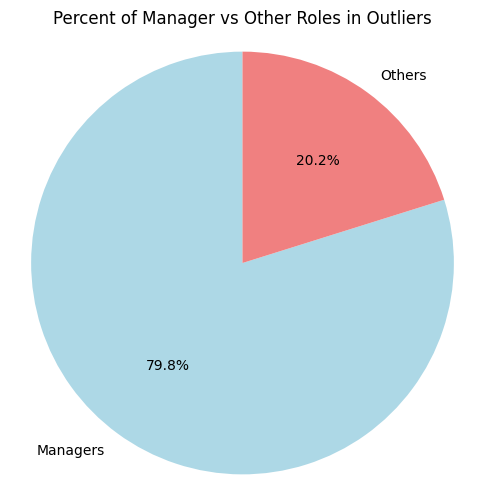

In [ ]:
# Percent of manager and others in outliers
total_outliers = df[df['Salary'] > 289768.625]
percent_managers = (total_outliers[total_outliers['JobRole'].str.contains('Manager')].shape[0] / total_outliers.shape[0]) * 100
percent_others = 100 - percent_managers

# Pie chart
plt.figure(figsize=(6, 6))
labels = ['Managers', 'Others']
sizes = [percent_managers, percent_others]
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percent of Manager vs Other Roles in Outliers')
plt.axis('equal')
plt.show()


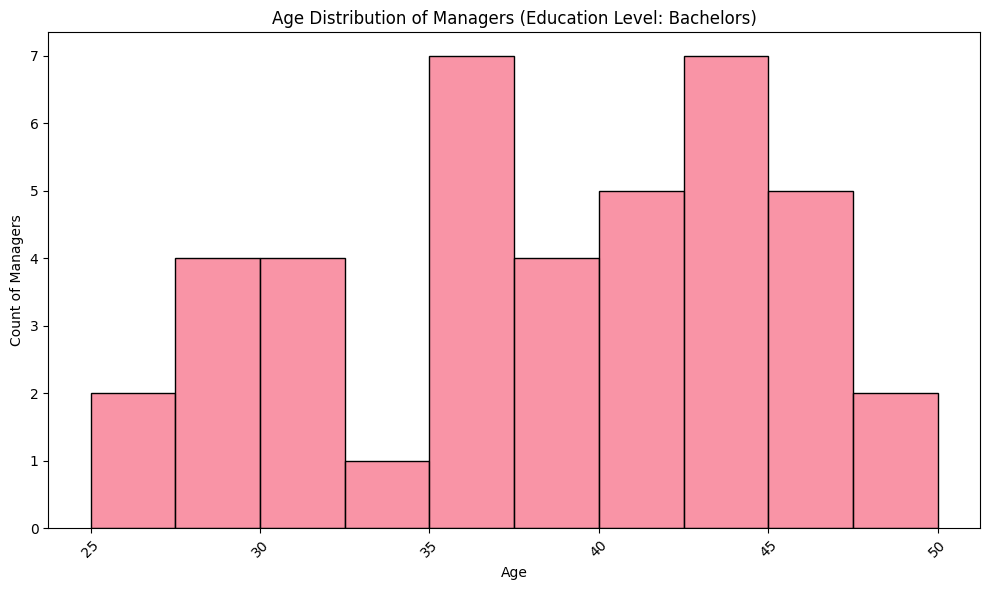

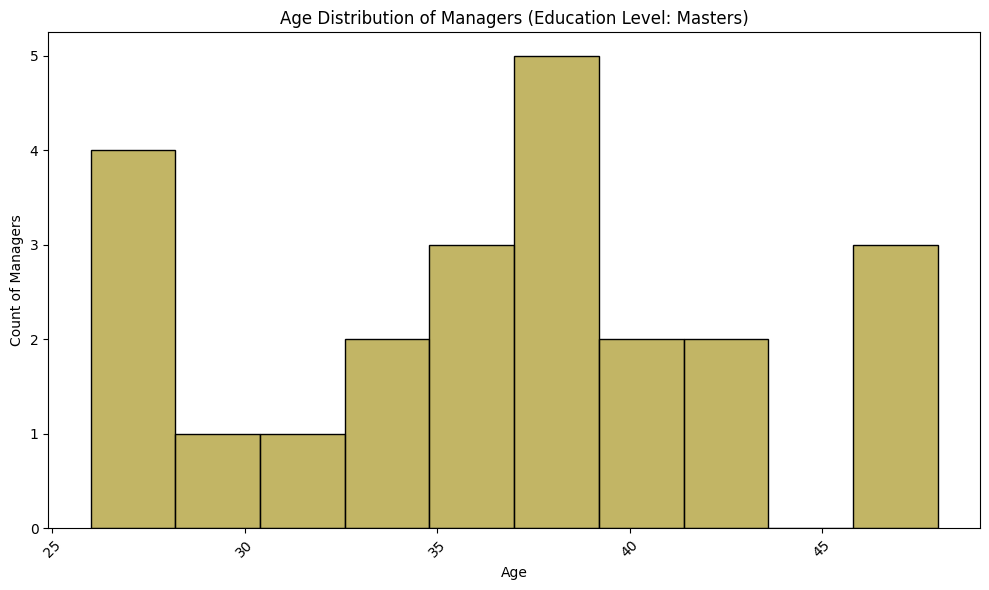

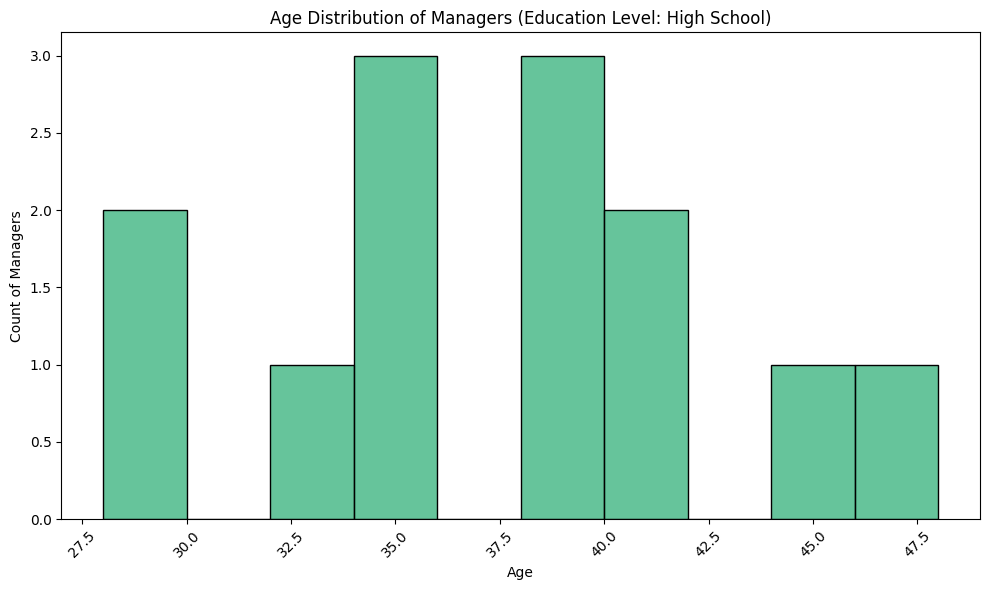

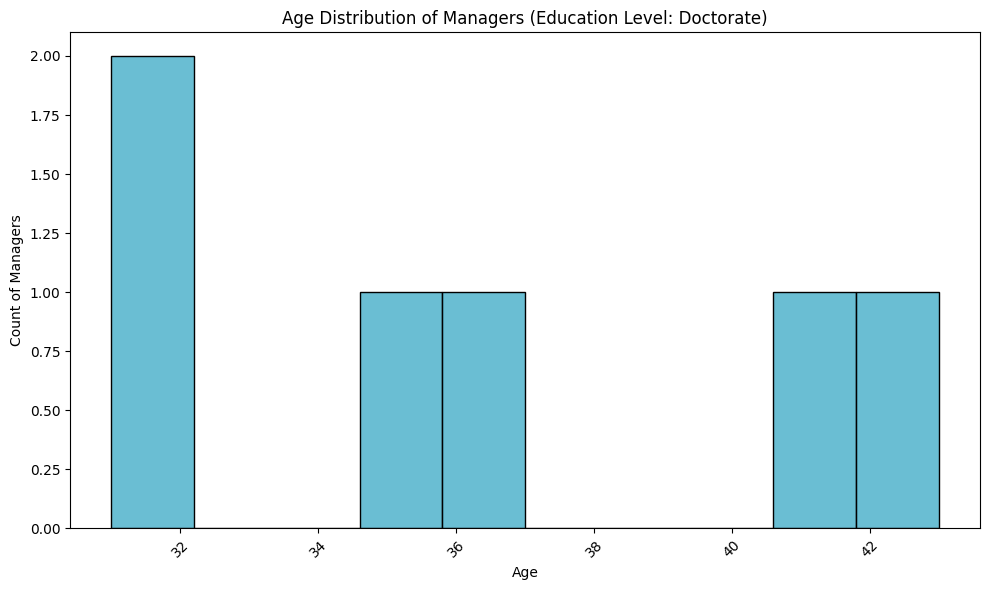

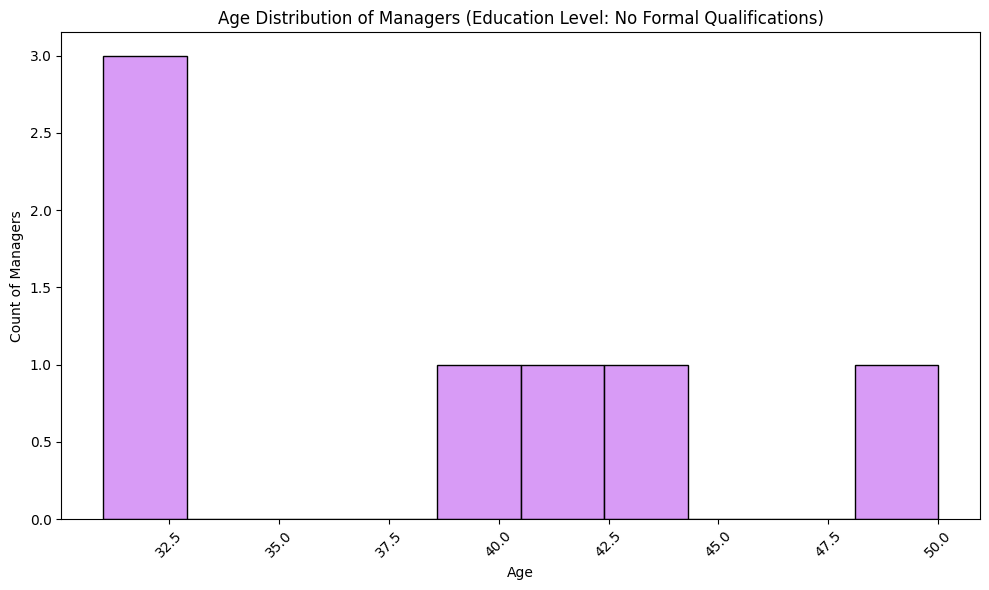

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Employee and Performance are pandas DataFrames

# Filter the DataFrame based on the salary and JobRole
filtered_df = df.merge(df2, on='EmployeeID').query(
    "Salary > 289768.625 and JobRole.str.contains('Manager')", engine='python')

# Select distinct values for the specified columns
distinct_df = filtered_df[['JobRole', 'Age', 'Salary', 'Education', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion']].drop_duplicates()

# Get the unique education levels
education_levels = distinct_df['Education'].unique()

# Create a color palette for each education level
palette = sns.color_palette("husl", len(education_levels))

# Loop through each education level and plot a histogram separately
for i, education_level in enumerate(education_levels):
    # Filter the data for each education level
    education_data = distinct_df[distinct_df['Education'] == education_level]

    # Visualization: Histogram of age distribution for each education level
    plt.figure(figsize=(10, 6))
    sns.histplot(education_data['Age'], bins=10, kde=False, color=palette[i])

    plt.title(f'Age Distribution of Managers (Education Level: {education_level})')
    plt.xlabel('Age')
    plt.ylabel('Count of Managers')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Features Define

In [42]:
# Assuming your DataFrame is named df and the target column is called 'target'
features = ['Age', 'DistanceFromHome (KM)',
        'Salary', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

feature_names = df[features]
  # Drop the target column to get feature names


class_names = df['Attrition'].unique().astype(str)  # Get the unique classes as strings

In [43]:
# Separate features and target
X = df[features]
y = df['Attrition']

In [44]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome (KM)    1470 non-null   int64
 2   Salary                   1470 non-null   int64
 3   YearsAtCompany           1470 non-null   int64
 4   YearsSinceLastPromotion  1470 non-null   int64
 5   YearsWithCurrManager     1470 non-null   int64
dtypes: int64(6)
memory usage: 69.0 KB


In [45]:
df['Attrition'].replace({'No': 0, 'Yes': 1}, inplace=True)

<ipython-input-45-774dd3ba4381>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'].replace({'No': 0, 'Yes': 1}, inplace=True)


In [46]:
y = df['Attrition']

In [48]:
y.value_counts()

,count
Attrition,
0,1233
1,237


 # Decision Tree Classifier

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

In [51]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [52]:
# Fit model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# test the model
y_pred = clf.predict(X_test)

In [54]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.01%


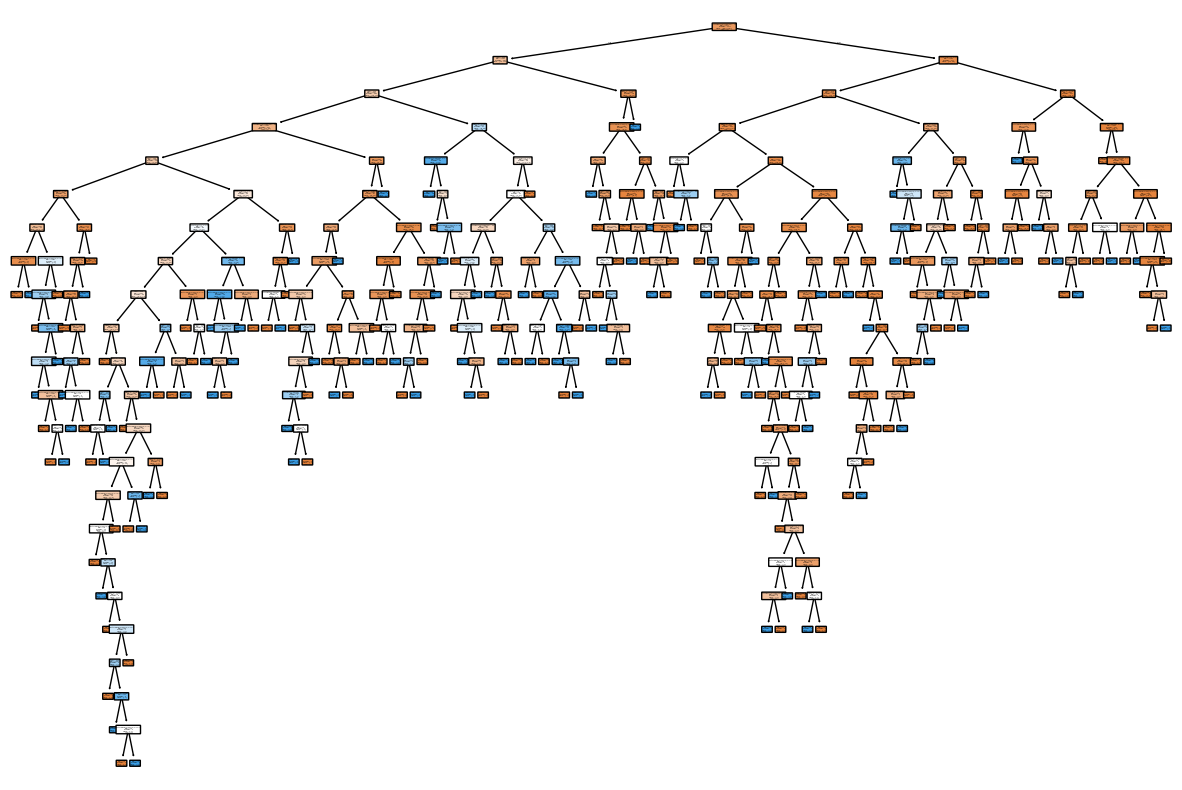

In [55]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [56]:
# New points to test
features = ['Age', 'DistanceFromHome (KM)',
        'Salary', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Multiple new data samples
new_data_batch = [[35, 10, 50000, 5, 2, 3],
                  [28, 15, 60000, 3, 1, 4],
                  [25, 12, 45000, 4, 1, 2]]


# Predict the class for each data point in the batch
batch_predictions = clf.predict(new_data_batch)

# Display the batch prediction results
for i, prediction in enumerate(batch_predictions):
    result = "Yes" if prediction == 1 else "No"
    print(f"Data Point {i+1}: Predicted Attrition: {result}")


Data Point 1: Predicted Attrition: Yes
Data Point 2: Predicted Attrition: Yes
Data Point 3: Predicted Attrition: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
